<a href="https://colab.research.google.com/github/rmorlowski/Machine-Learning/blob/master/Boston_Housing_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forests

This assignment builds on work completed from the Evaluating Regression Models notebook. This notebook adds random forests to the set of modeling methods being studied.

Boston Housing Study (Python)using data from the Boston Housing Study case as described in "Marketing Data Science: Modeling Techniques for Predictive Analytics with R and Python" (Miller 2015).

Here we use data from the Boston Housing Study to evaluate regression modeling methods within a cross-validation design.  Program revised by Thomas W. Milller (2017/09/29).

Scikit Learn documentation for this assignment: http://scikit-learn.org/stable/modules/model_evaluation.html 
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html


#### Section 1: Ingest - Data Survey

An initial data survey will provide an idea for the type of data we are analyzing.  The first step, is taking a look at the data to get a record count, identify missing values, and potential new variables.

This section shows how to read in data from a comma-delimited text file manipuate data, create new count variables, define categorical variables



In [0]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [0]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [0]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis, skew

In [0]:
# modeling routines from Scikit Learn packages
from sklearn import linear_model
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [0]:
get_ipython().magic(u'matplotlib inline')
#Set some display options   
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [0]:
# suppress Pandas "FutureWarning"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
# read data for the Boston Housing Study
# creating data frame restdata
#boston_input = pd.read_csv('boston.csv')

In [0]:
# Import file to google colaboratory
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston (1).csv


In [0]:
import io
# read data for the Boston Housing Study
boston_input = pd.read_csv('boston.csv')

In [0]:
# examine the structure of the DataFrame object
print('\nContents of initial Boston data ---------------')


Contents of initial Boston data ---------------


In [0]:
# examine the shape of input data
print(boston_input.shape)

(506, 14)


In [0]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33  36.2
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   9.08  20.6
503     Winthrop  0.0607

In [0]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [0]:
#Do we have missing values? 
datasetHasNan = False
if boston_input.count().min() == boston_input.shape[0]:
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan')

We do not need to worry about missing values.


In [0]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [0]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms         age         dis         rad  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901    3.795043    9.549407   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861    2.105710    8.707259   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000    1.129600    1.000000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000    2.100175    4.000000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000    3.207450    5.000000   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000    5.188425   24.000000   
max     88.9762

In [0]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [0]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


#### Section 2: EDA

In [0]:
# pandas Profile Report to kick-off EDA
# pandas_profiling.ProfileReport(boston)

In [0]:
# First we look for the highly skewed features.
numerical = boston.dtypes[boston.dtypes != 'object'].index

skewness = boston[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

       Skewness
crim   5.207652
chas   3.395799
zn     2.219063
mv     1.107616
dis    1.008779
rad    1.001833
lstat  0.903771
nox    0.727144
tax    0.667968
rooms  0.402415

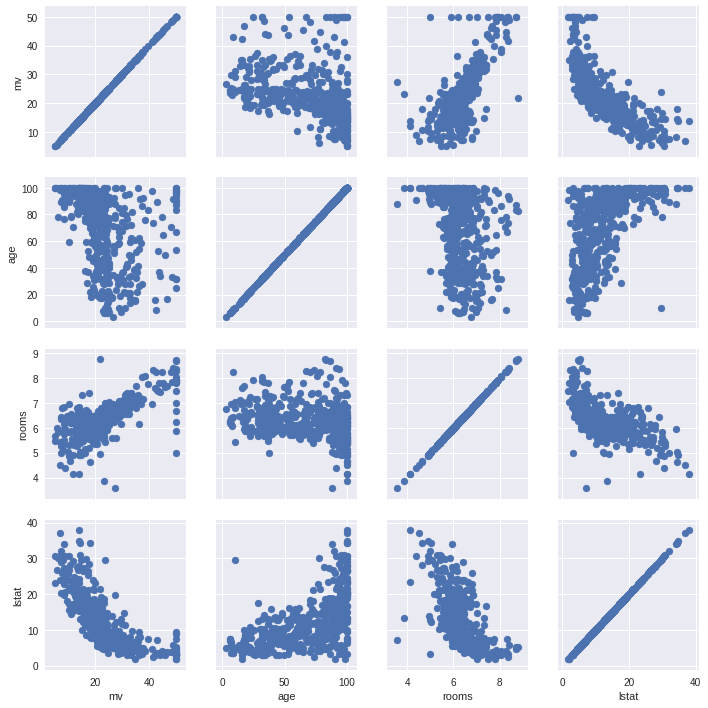

In [0]:
# Plot a subset of variables
g = sns.PairGrid(boston, vars=["mv", "age", "rooms","lstat"])
g = g.map(plt.scatter)

crim           AxesSubplot(0.125,0.71587;0.133621x0.16413)
zn          AxesSubplot(0.285345,0.71587;0.133621x0.16413)
indus        AxesSubplot(0.44569,0.71587;0.133621x0.16413)
chas        AxesSubplot(0.606034,0.71587;0.133621x0.16413)
nox         AxesSubplot(0.766379,0.71587;0.133621x0.16413)
                                ...                       
rad        AxesSubplot(0.606034,0.518913;0.133621x0.16413)
tax        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
ptratio       AxesSubplot(0.125,0.321957;0.133621x0.16413)
lstat      AxesSubplot(0.285345,0.321957;0.133621x0.16413)
mv          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Length: 13, dtype: object

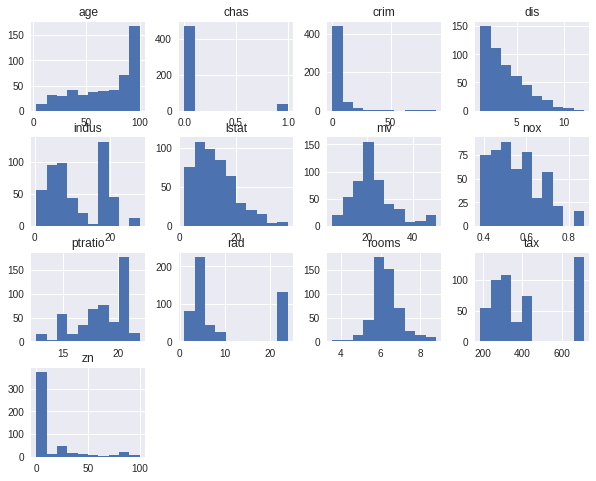

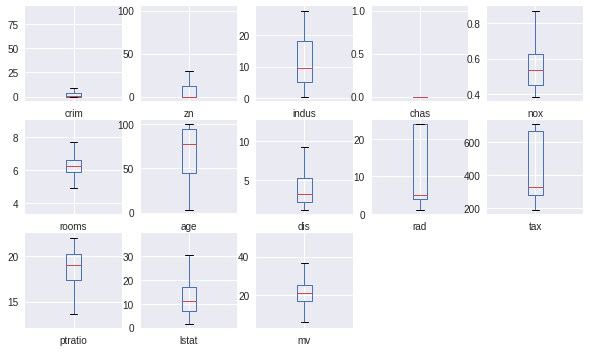

In [0]:
#///Do some more EDA///;
#Some quick plots of the data
boston.hist(figsize=(10,8))
boston.plot(kind= 'box' , subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(10,8))

The cheapest house sold for $5 and the most expensive for $50
The average sales price is $23, while median is $21


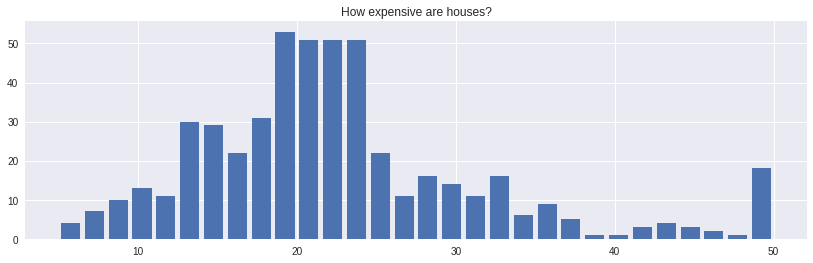

In [0]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    boston.mv.min(), boston.mv.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    boston.mv.mean(), boston.mv.median()))
boston.mv.hist(bins=30, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()
# This seems rather odd for housing prices...

Text(0.5, 1.0, 'Median Value vs Charles River')

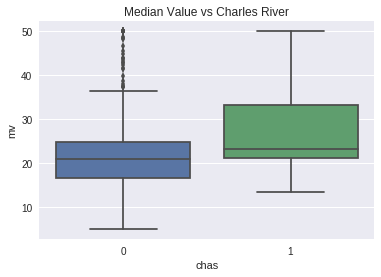

In [0]:
#EDA Discrete Variable Analysis (Categorical)
#Boxplots of the response variable saleprice vs predictor variables
sns.boxplot(x="chas", y="mv", data=boston).set_title('Median Value vs Charles River')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


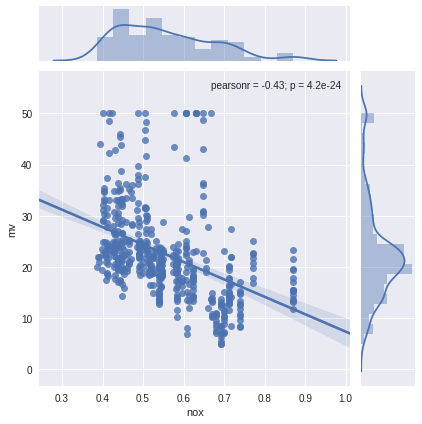

In [0]:
# Joint Distribution Plot of pollution
sns.jointplot(x='nox', y='mv', data=boston, kind="reg")

##### Visualize

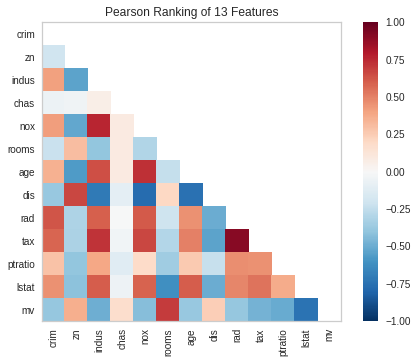

In [0]:
# Use the Rank2D visualizer to compute Pearson correlations between all pairs of features.
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(boston)
visualizer.poof()

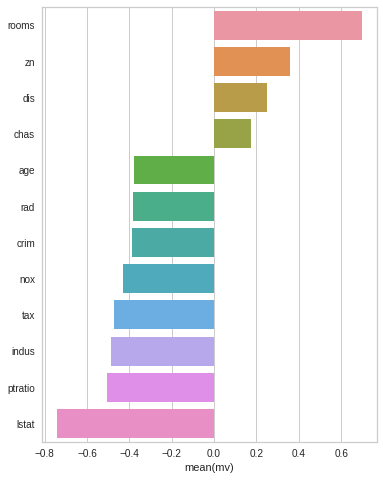

In [0]:
# Compute the correlation matrix
corr = boston.corr()
# Feature sorted by correlation to target 'mv', from positive to negative
corr = corr.sort_values('mv', ascending=False)
plt.figure(figsize=(6,8))
sns.barplot( corr.mv[1:], corr.index[1:], orient='h')
plt.show()

##### Train/Test Split

Train/Test split of the dataset in preparation for modeling and cross-validation.

In [0]:
# Log transform the target for official scoring
boston.mv = np.log1p(boston.mv)
y = boston['mv'].values #Target
y = y.reshape(-1, 1)

In [0]:
X = boston[['crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']].values #Feature(s)
#X = X.reshape(-1,1)

In [0]:
y.shape

(506, 1)

In [0]:
X.shape

(506, 12)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 12) (404, 1)
(102, 12) (102, 1)


##### Standardization & Scaling

**NOTE:**  Standardization cannot be done before the partitioning, as we don't want to fit the StandardScaler on some observations that will later be used in the test set.

In [0]:
# Standardize features
stdSc = StandardScaler()
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.transform(X_test)

#### Section 3: Modeling

Employ at least two regression modeling methods selected from those discussed in chapter 4 of the Géron (2017) textbook: linear regression, stochastic gradient descent, ridge regression, lasso regression, and elastic net. Also employ random forests to the regression problem, following methods described in Géron (2017) chapter 7. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.

##### Linear Regression

Let’s fit a linear regression to our model and plot the residuals.

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [0]:
lm.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [0]:
type(predictions)

numpy.ndarray

In [0]:
# Compute the error.
mean_squared_error(predictions, y_test)

0.038202548486059196

Text(0, 0.5, 'Predicted mv')

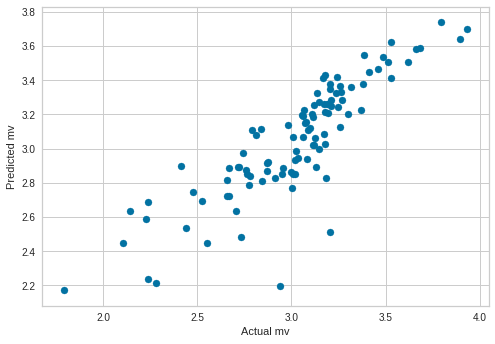

In [0]:
# Plot Predictions
plt.scatter(y_test, predictions)
plt.xlabel("Actual mv")
plt.ylabel("Predicted mv")

In [0]:
# Print Accuracy of Linear Regression Model
model.score(X_test, y_test)

0.7339760850102788

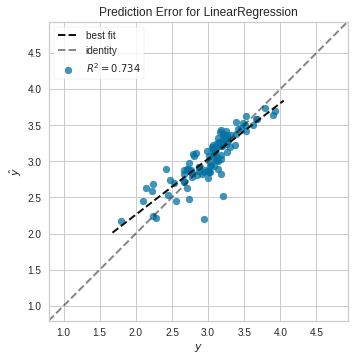

In [0]:
# Visualize Regression Lasso (Regression) Model Accuracy with Yellowbrick
from yellowbrick.regressor import PredictionError

lr = LinearRegression()
visualizer = PredictionError(lr)
visualizer.fit(X_train, np.squeeze(y_train)) # Fit the training data to the visualizer
visualizer.score(X_test, np.squeeze(y_test)) # Evaluate the model on the test data
g = visualizer.poof()            # Draw/show/poof the data

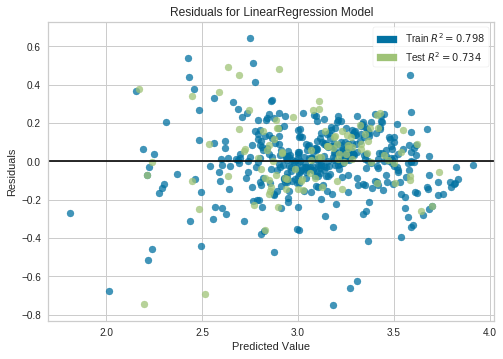

In [0]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

visualizer = ResidualsPlot(LinearRegression(), hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

**Cross-Validation of Linear Model**

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [0]:
scores = cross_val_score(model, X, y, cv=6)
scores

array([0.72887569, 0.54919052, 0.50635864, 0.76772374, 0.25716594,
       0.58777562])

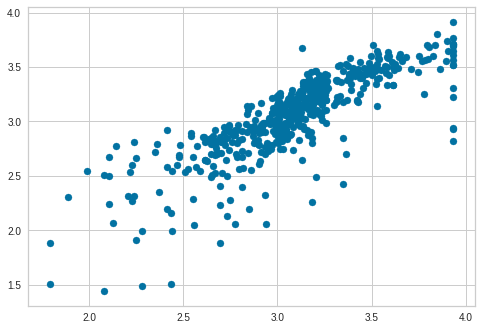

In [0]:
# Plot Cross-validation Predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.638596405365784

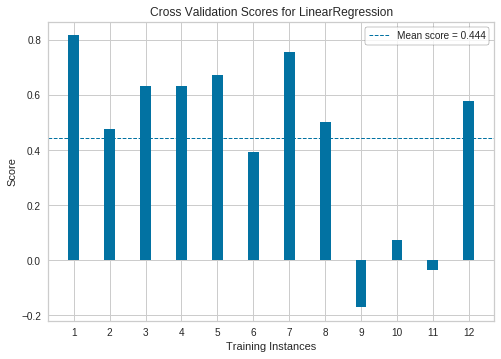

In [0]:
# Visualize cross-validated scores for Linear regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    linear_model.LinearRegression(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

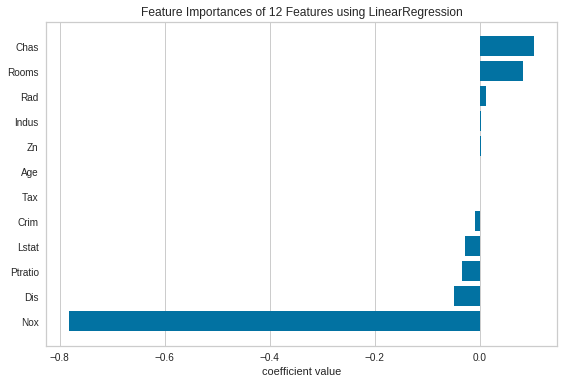

In [0]:
from yellowbrick.features.importances import FeatureImportances

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

features = [
    'crim', 'zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'
]


# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(LinearRegression(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

**Let’s see if we can fit a better model using regularization, and explore another visualizer at the same time.**

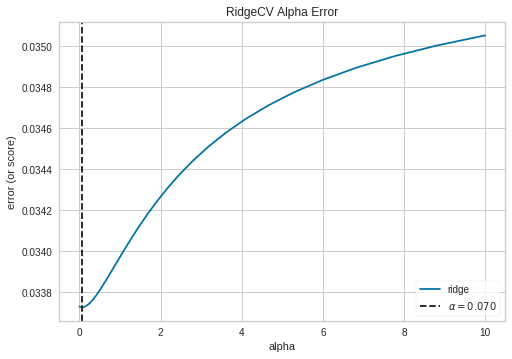

In [0]:
# The AlphaSelection visualizer allows you to do just that, with a visual representation that shows the behavior of the regularization. 
# This allows us to target the bias/variance trade-off and to explore the relationship of regularization methods (for example Ridge vs. Lasso).

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, np.squeeze(y))
visualizer.poof()

##### Ridge Regression

In [0]:
rm = linear_model.Ridge()
model2 = rm.fit(X_train, y_train)
predictions = rm.predict(X_test)

In [0]:
rm.predict

<bound method LinearModel.predict of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [0]:
# Compute the error.
mean_squared_error(predictions, y_test)

0.03812658275287086

Text(0, 0.5, 'Predicted mv')

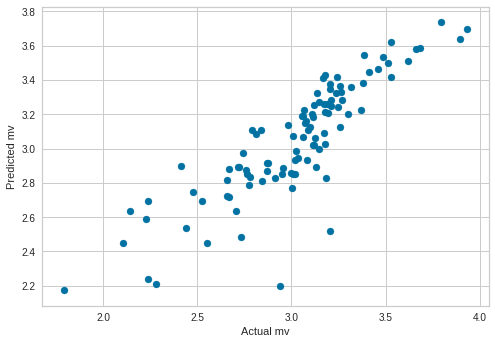

In [0]:
# Plot Predictions
plt.scatter(y_test, predictions)
plt.xlabel("Actual mv")
plt.ylabel("Predicted mv")

In [0]:
# Print Accuracy of Ridge Regression Model
model2.score(X_test, y_test)

0.7345050733251606

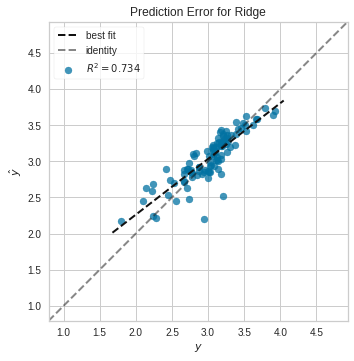

In [0]:
# We can now train our final model and visualize it with the PredictionError visualizer
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=0.070))
visualizer.fit(X_train, np.squeeze(y_train))
visualizer.score(X_test, np.squeeze(y_test))
visualizer.poof()

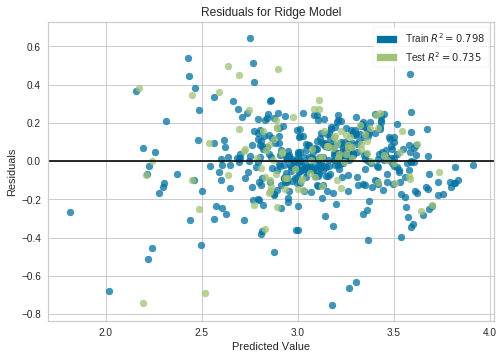

In [0]:
# 2* Ridge - Residuals Plot
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

**Cross-Validation of Ridge Model**

In [0]:
scores = cross_val_score(model2, X, y, cv=6)
scores

array([0.73665679, 0.65426713, 0.51663864, 0.77948051, 0.23582806,
       0.58198304])

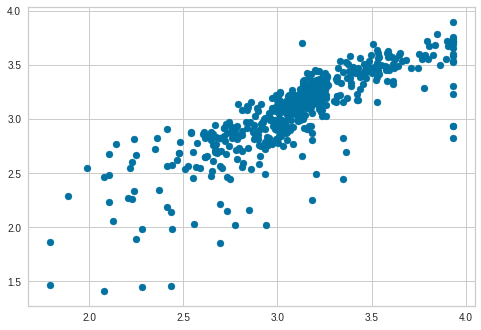

In [0]:
# Plot Cross-validation Predictions for Ridge Model
predictions = cross_val_predict(model2, X, y, cv=6)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.6447194952008719

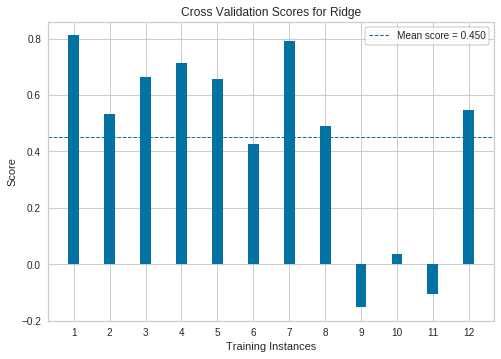

In [0]:
# Visualize cross-validated scores for Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    linear_model.Ridge(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

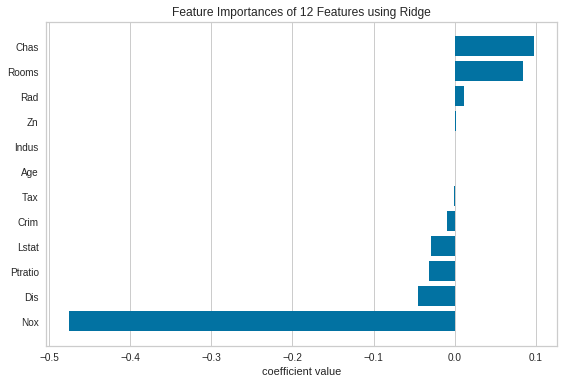

In [0]:
# Create a new figure with Feature Importance for Ridge
fig = plt.figure()
ax = fig.add_subplot()


# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Ridge(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

##### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model with some parameters.
RFmodel = RandomForestRegressor(bootstrap=True, max_features='log2', n_estimators=100, min_samples_leaf=10, random_state=1)

In [0]:
# Fit the model to the data.
rf = RFmodel.fit(X_train, np.ravel(y_train))
print(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


In [0]:
# Make predictions.
RFpredictions = RFmodel.predict(X_test)

In [0]:
# Compute the error.
mean_squared_error(RFpredictions, y_test)

0.030616410928728632

Text(0, 0.5, 'Predicted mv')

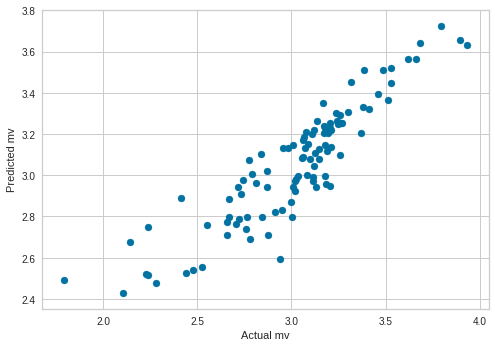

In [0]:
# Plot RF Predictions
plt.scatter(y_test, RFpredictions)
plt.xlabel("Actual mv")
plt.ylabel("Predicted mv")

In [0]:
# Print Accuracy of Ridge Regression Model
RFmodel.score(X_test, y_test)

0.7868022469452104

**Cross-Validation of Random Forest Model**

In [0]:
scores = cross_val_score(RFmodel, X, np.ravel(y), cv=6)
scores

array([0.62197111, 0.8079607 , 0.53657711, 0.71556761, 0.48197509,
       0.56578753])

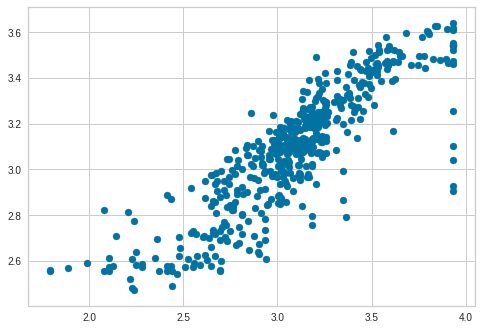

In [0]:
# Plot Cross-validation Predictions for Ridge Model
predictions = cross_val_predict(RFmodel, X, np.ravel(y), cv=6)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.7162095886601503

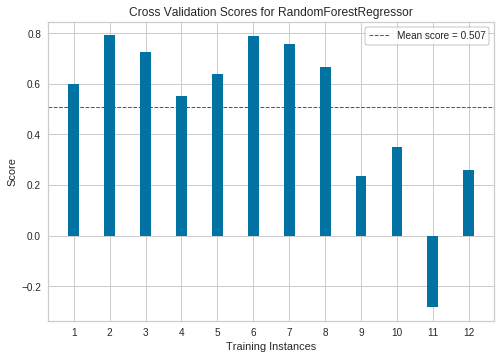

In [0]:
# Visualize cross-validated scores for Random Forest regression model

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    RandomForestRegressor(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, np.ravel(y))
oz.poof()

Which explanatory variables are most important in predicting home prices?

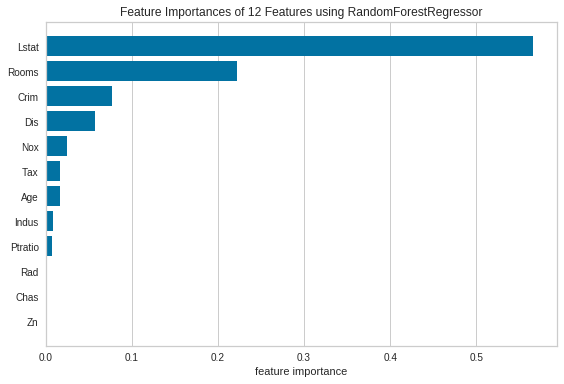

In [0]:
# Create a new figure with Feature Importance for RF Model
fig = plt.figure()
ax = fig.add_subplot()


# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(RandomForestRegressor(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, np.ravel(y))
viz.poof()

#### Section 4:  Conclusion

The objective of the study was to predict median housing prices using machine learning methods.  Between the three modeling methods examined in this study (linear, Ridge, and Random Forest), I would recommend to management Random Forest regression due to the unusual scale and skewing of the data.  After cross-validation, the Random Forest model with regularization resulted in improved performance compared to linear or Ridge regression.

**To Summarize:**

After thorough EDA and visualization, we discovered many important variables for predicting the median value for homes in Boston.  Using linear, Ridge, and random forest regression, we were able to create three different models for predicting home prices.

The results showed:

*    Random forest resulted in the most accurate predictions for median home prices.
*   Cross-Validation improved accuracy and resulted in a higher RMSE value for the random forest model.
*    Reviewing the results of the random forest, the explanatory variables that are most important in predicting home prices include; percentage of population of lower socio-economic status, average number of rooms per home, crime rate, weighted distance to employment centers, and pollution.

The final recommendation to leadership is to use random forest regression.  This model out performs its parametric equivalents, linear and Ridge regression.